In [1]:
%pylab inline 
import yt 
yt.funcs.mylog.setLevel(50) #coerce output null

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_2/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object


In [3]:
import glob
lst = glob.glob("fat*")

In [4]:
cd fat10/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object/fat10


In [5]:
i =0 
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"

In [41]:
ds.domain_left_edge
ds.domain_right_edge

YTArray([  1.00000000e+19,   1.00000000e+19,   1.00000000e+19]) code_length

In [59]:
all_data_level_5 = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[256,256,256])

In [60]:
#lrefine_min     = 2 
#lrefine_max     = 5 

In [61]:
dens_arr =  np.array(all_data_level_5["density"])

In [62]:
shape(dens_arr)

(256, 256, 256)

In [64]:
from numpy import unravel_index
unravel_index(dens_arr.argmax(), dens_arr.shape)

(126, 126, 126)

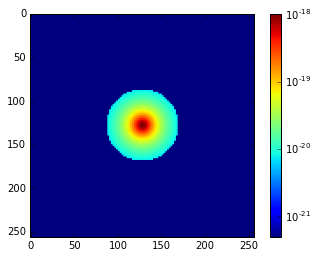

In [68]:

plt.imshow(dens_arr[:,126,:],cmap=cm.jet,norm=LogNorm())
plt.colorbar()

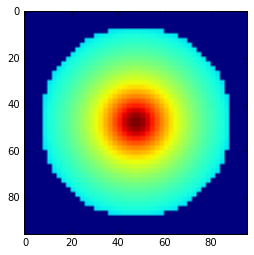

In [82]:
plt.imshow(dens_arr[80:176,126,80:176],cmap=cm.jet,norm=LogNorm())

to save myself some computational time, I'm just going to loop through 80:176

In [92]:
cell_size = (ds.domain_width/dims)[0].in_cgs()

In [93]:
cell_size

3.90625e+16 cm

In [94]:
dr = cell_size

In [95]:
rr = sqrt(i**2+j**2+k**2)
r = cell_size*rr

In [96]:
r

1.7252849841e+19 cm

In [ ]:
dims = 256
r = 10
for i in np.arange(80,176):
    for j in np.arange(80,176): 
        for k in np.arange(80,176) : 
            rr = sqrt(i**2+j**2+k**2)
            r = cell_size*rr
            if rr< rcloud:
                print dens_arr[i][j][k]

This is too refined, too expensive to do triple for loop , lets go down some AMR level 

The number of dim that should be used with a covering grid is $2^{level+3}$

In [63]:
lev = 3
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])

Note that you can only do one covering_grid per dataset 

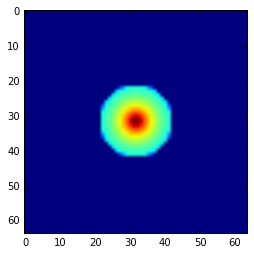

In [45]:
import matplotlib.cm as cm 
from matplotlib.colors import LogNorm
plt.imshow(dens_arr[:,dim/2,:],cmap=cm.jet,norm=LogNorm())

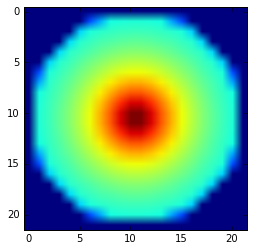

In [59]:
margin = dim/3
start  = margin
end = dim-margin
plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())

In [61]:
print end-start
print "looping through: ", (end-start)**3

22
looping through:  10648


In [100]:
cell_size = int((ds.domain_width/dims)[0].in_cgs())

In [ ]:
ls

In [106]:
#let dr = cell_size 
rcloud =1.59886e18 #xi = 16.90 (/1.057E-17 conv factor) 
dims = 256
xyzrange = np.arange(start,end)
sum_args = 0
for i in xyzrange:
    for j in xyzrange: 
        for k in xyzrange: 
            r = sqrt(i**2+j**2+k**2)*cell_size
#             if rr< rcloud:
            if np.isclose(r,rcloud,atol=cell_size):
                sum_args+=r**2*dens_arr[i][j][k]*cell_size

In [111]:
G = 6.67e-8 #cgs
a = 28730.5 #cm/s
4*pi*G*sum_args/rcloud/a

130288.02401027759

In [118]:
xi_range = np.logspace(-8,2)
r_range = xi_range/1.057E-17

In [119]:
#let dr = cell_size 
rcloud =1.59886e18 #xi = 16.90 (/1.057E-17 conv factor) 
dims = 256
xyzrange = np.arange(start,end)
sum_args_list = []
for ri in r_range:
    sum_args = 0
    for i in xyzrange:
        for j in xyzrange: 
            for k in xyzrange: 
                r = sqrt(i**2+j**2+k**2)*cell_size
    #             if rr< rcloud:
                if np.isclose(r,ri,atol=cell_size):
                    sum_args+=r**2*dens_arr[i][j][k]*cell_size
    sum_args_list.append(sum_args)

In [121]:
sum_args_list = np.array(sum_args_list)

In [122]:
sum_args_list

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         4.13686037e+32,   2.20431159e+36,   0.00000000e+00,
         0.00000000e+00,

This means that I would need to go in a bit further, maybe by levelling up AMR 

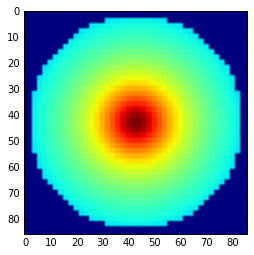

In [124]:
lev = 5
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])

margin = dim/3
start  = margin
end = dim-margin
plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())
cell_size = int((ds.domain_width/dims)[0].in_cgs())

In [125]:
print end-start
print "looping through: ", (end-start)**3

86
looping through:  636056


In [126]:
xi_range = np.logspace(-8,2)
r_range = xi_range/1.057E-17
#let dr = cell_size 
rcloud =1.59886e18 #xi = 16.90 (/1.057E-17 conv factor) 
dims = 256
xyzrange = np.arange(start,end)
sum_args_list = []
for ri in r_range:
    sum_args = 0
    for i in xyzrange:
        for j in xyzrange: 
            for k in xyzrange: 
                r = sqrt(i**2+j**2+k**2)*cell_size
    #             if rr< rcloud:
                if np.isclose(r,ri,atol=cell_size):
                    sum_args+=r**2*dens_arr[i][j][k]*cell_size
    sum_args_list.append(sum_args)

In [128]:
sum_args_list = np.array(sum_args_list)

In [129]:
sum_args_list

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         7.44578540e+34,

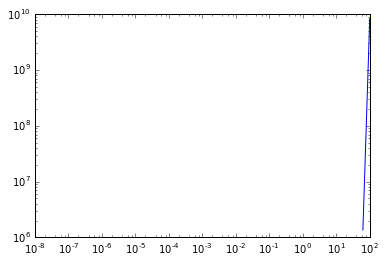

In [132]:
plt.loglog(xi_range,4*pi*G*sum_args_list/rcloud/a)